# Analysis of Titanic passenger data

## Import necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('titanic_data.csv')
df.head().style.hide_index()


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S


## Handling Missing Values

##### Create a new dataframe by dropping all rows with NaN in the Age column

In [3]:
new_df = df.dropna(subset=['Age'])

new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Separate the new dataframe into two based on gender

In [4]:
male_passengers_df = new_df[new_df['Sex'] == 'male']
male_passengers_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


In [5]:
female_passengers_df = new_df[new_df['Sex'] == 'female']
female_passengers_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


##### Determine the average age for each gender

In [6]:

import math

average_age_male = float(math.ceil(male_passengers_df['Age'].mean())) # Round up the mean age value obtained 
average_age_female = float(math.ceil(female_passengers_df['Age'].mean())) # Round up the mean age value obtained 

print(average_age_male)
print(average_age_female)

31.0
28.0


##### Replace missing ages in original dataframe with average age (with respect to gender)

In [7]:
titanic_df = df.fillna({'Age': 0})
titanic_df['Age'] = np.where((titanic_df['Sex'] == 'male') & (titanic_df['Age'] == 0), average_age_male, titanic_df['Age'])
titanic_df['Age'] = np.where((titanic_df['Sex'] == 'female') & (titanic_df['Age'] == 0), average_age_female, titanic_df['Age'])

titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Augment Data with additional columns

##### Create Female column to categorise sex as a numerical variable  with Female = 1, Male = 0

Rationale: To determine correlation 

In [8]:
titanic_df['Female'] = np.where((titanic_df['Sex'] == 'male'), 0, 1)

#titanic_df = titanic_df.drop(columns='Gender')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


##### Fill the NaN values in Cabin column with NG (Not Given)

Supply reasoning for this

In [9]:
titanic_df = titanic_df.fillna({'Cabin': 'NG'})
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NG,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NG,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NG,S,0


## Data Exploration

#### Question 1: What was the average age of passengers on the Titanic?

In [10]:
average_age = math.ceil(titanic_df['Age'].mean())

average_age

30

#### Question 2: What was the average age of female passengers?

In [11]:
mean_age_female = math.ceil((titanic_df[titanic_df['Sex'] == 'female'])['Age'].mean())
print(mean_age_female, "years")

28 years


#### Question 3: What was the average age of male passengers?

In [12]:
mean_age_male = math.ceil((titanic_df[titanic_df['Sex'] == 'male'])['Age'].mean())
print(mean_age_male, "years")

31 years


#### Question 4: What was the range of ages for female passengers?

In [13]:
age_range_female = (titanic_df[titanic_df['Sex'] == 'female'])['Age'].max() - (titanic_df[titanic_df['Sex'] == 'female'])['Age'].min()
print(age_range_female, "years") 

62.25 years


#### Question 5: What was the range of ages for male passengers?

In [14]:
age_range_male = (titanic_df[titanic_df['Sex'] == 'male'])['Age'].max() - (titanic_df[titanic_df['Sex'] == 'male'])['Age'].min()
print(age_range_male, "years")

79.58 years


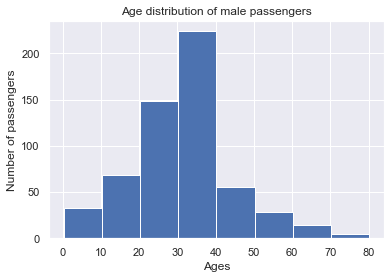

In [15]:
sns.set()
bin_edges = range(0, 100, 10)
plt.hist((titanic_df[titanic_df['Sex'] == 'male'])['Age'], bins=8)
plt.title("Age distribution of male passengers")
plt.ylabel('Number of passengers')
plt.xlabel("Ages");


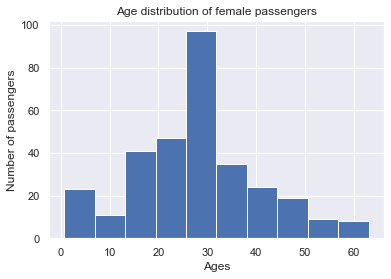

In [16]:
bin_edges = range(0, 100, 10)
plt.hist((titanic_df[titanic_df['Sex'] == 'female'])['Age'], bins=10, rwidth=1)
plt.title("Age distribution of female passengers")
plt.ylabel('Number of passengers')
plt.xlabel("Ages");


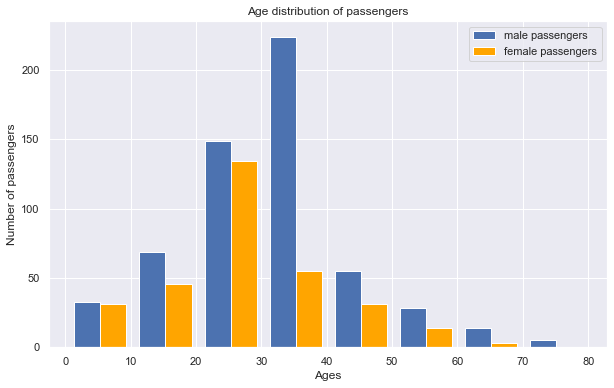

In [17]:
from matplotlib import rcParams


male_ages = (titanic_df[titanic_df['Sex'] == 'male'])['Age']
female_ages = (titanic_df[titanic_df['Sex'] == 'female'])['Age']

rcParams['figure.figsize'] = 10, 6
bin_edges = range(0, 100, 10)
plt.hist([male_ages, female_ages], bins=8, color=['b','orange'
                                                 ], label=['male passengers', 'female passengers'])
        # orientation = 'horizontal')
   
plt.title("Age distribution of passengers")
plt.ylabel('Number of passengers')
plt.xlabel("Ages")
plt.legend();


#### Question 6: What factors made a passenger more likely to survive?

   ##### Create a function to determine correlation between variables.

In [18]:
def correlation(x, y):
    '''
    This function computes the correlation between two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Pass the argument "ddof=0" to the Pandas std() function.
    '''
    
    std_x = (x - x.mean())/x.std(ddof=0)
    std_y = (y - y.mean())/y.std(ddof=0)
    
    product_std = std_x * std_y
    
    average_product = product_std.mean()
    
    return average_product


In [19]:
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NG,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NG,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NG,S,0


##### Convert the relevant columns of the dataframe into variables

In [20]:

survival = titanic_df['Survived']

passenger_class = titanic_df['Survived']
female = titanic_df['Female']
age = titanic_df['Age']
siblings_or_spouse = titanic_df['SibSp']
parent_or_child = titanic_df['Parch']
fare = titanic_df['Fare']


##### Determine the correlation between survival and other variables by passing them into the correlation function

In [21]:
print(correlation(survival, passenger_class))

print(correlation(survival, female))

print(correlation(survival, age))

print(correlation(survival, siblings_or_spouse))

print(correlation(survival, parent_or_child))

print(correlation(survival, fare))


1.0000000000000007
0.5433513806577474
-0.08173571368244108
-0.03532249888573573
0.08162940708348272
0.2573065223849616


Observation:

There is a very strong positive linear correlation between survival and the passenger's class of ticket. As the class of ticket provides a metric for socio-economic status, the data suggests that members of the upper class were more likely to survive the shipwreck of the Titanic than members of the lower class. 

There is also a strong positive linear correlation between survival and the passenger's gender. The data indicates that female passengers were more likely to be among the survivors of the wreck than male passengers. 

#### Question 7: Compare the number of passengers based on gender

In [22]:
num_passengers = len(titanic_df)

num_female_passengers = titanic_df['Female'].sum()
num_male_passengers = num_passengers - num_female_passengers

print(num_passengers)
print(num_female_passengers)
print(num_male_passengers)

891
314
577


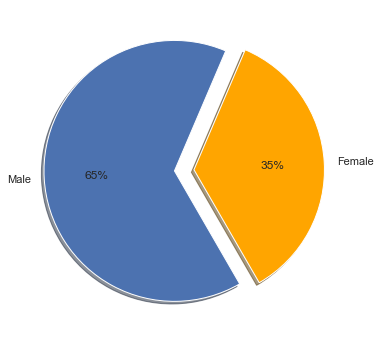

In [23]:
gender = titanic_df.groupby('Sex').count()['PassengerId']


keys = ['Female', 'Male',]
plt.pie(gender, labels = keys, autopct= '%0.0f%%', shadow=True, explode=[0, 0.15], startangle=300, colors=['orange', 'b']);

#### Question 8: Compare the number of passengers based on point of embarkation

In [24]:
num_southampton_boarders = len(titanic_df[titanic_df['Embarked'] == 'S'])
num_cherbourg_boarders = len(titanic_df[titanic_df['Embarked'] == 'C'])
num_queenstown_boarders = len(titanic_df[titanic_df['Embarked'] == 'Q'])

print(num_southampton_boarders)
print(num_cherbourg_boarders)
print(num_queenstown_boarders)

644
168
77


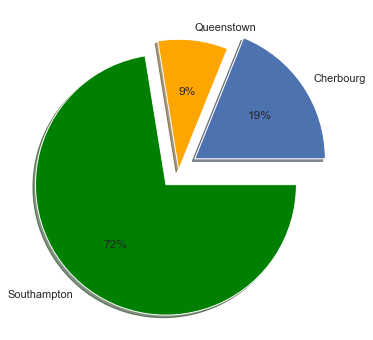

In [25]:
boarders = titanic_df.groupby('Embarked').count()['PassengerId']


keys = ['Cherbourg', 'Queenstown', 'Southampton']

plt.pie(boarders, labels = keys, autopct= '%0.0f%%', shadow=True, explode=[0.15, 0.0, 0.15], colors=['b', 'orange', 'green']);

#### Question 9: Compare the passengers based on their stage of life.

##### Create a new column 'Life Stages'

##### Note: 

These are the definitions used to categorise the passengers by life stage.
    
Children: Passengers below 13 years of age

Teenagers: Passengers between 13 and 19 years old

Adults: Passengers between 20 and 55 years old

Elders: Passengers older than 55

In [26]:
titanic_df['Life Stage'] = np.where((titanic_df['Age'] < 13.0), 'child', 0)
titanic_df['Life Stage'] = np.where((titanic_df['Age'] < 20.0) & (titanic_df['Age'] >= 13.0) , 'teen', titanic_df['Life Stage'])
titanic_df['Life Stage'] = np.where((titanic_df['Age'] < 55.0) & (titanic_df['Age'] >= 20.0), 'adult', titanic_df['Life Stage'])
titanic_df['Life Stage'] = np.where((titanic_df['Age'] >= 55.0), 'elder', titanic_df['Life Stage'])

titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Life Stage
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NG,S,0,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NG,S,1,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NG,S,0,adult


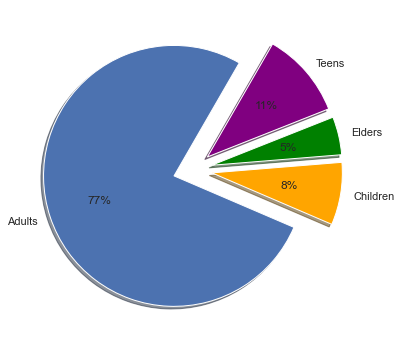

In [27]:
stages = titanic_df.groupby('Life Stage').count()['PassengerId']
#print(stages)

keys = ['Adults', 'Children', 'Elders', 'Teens']

plt.pie(stages, labels = keys, autopct= '%0.0f%%', 
        shadow=True, explode=[0.15, 0.15, 0.15, 0.15], colors=['b', 'orange', 'green', 'purple'], startangle=60);

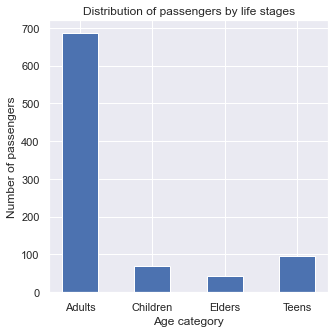

In [28]:
keys = ['Adults', 'Children', 'Elders', 'Teens']

rcParams['figure.figsize'] = 5, 5

plt.bar(keys, stages, color='b', width = 0.5)
plt.title("Distribution of passengers by life stages")
plt.ylabel('Number of passengers')
plt.xlabel("Age category");


##### Observation: 
There were 727 adults, 69 children & 95 teenagers onboard the Titanic (i.e. Summing up the elders and adults categories)

In [29]:
# Compare average age of passengers with NaN values as zero and NaN values as Average age

# See if you can Convert the correlations calculated above into variables and plot on a line graph 
# i.e P(S) = F(x) probability of survival as a function of the various factors
# Might be cause for reseaarch :)

# Observation on the normal distribution of ages of passengers
#Observation on mode of age of males btw 30 and 40 and mode of age of females btw 20 and 30
# Observation on skewness 